In [1]:
from __future__ import print_function
import os, sys
import logging
import six, csv
import numpy as np
import pandas as pd
import glob
import tqdm

# import matplotlib
# matplotlib.use("AGG")
import matplotlib.pyplot as plt

import pydicom as dicom
import nibabel as nib

import SimpleITK as sitk

import radiomics
from radiomics import featureextractor
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm

ModuleNotFoundError: ignored

In [0]:
train_image_folder = "train-images/image/"
train_list = os.listdir(train_image_folder)[:]

bad_train = ['.DS_Store']
for s in bad_train:
    if (s in train_list):
        train_list.remove(s)

In [0]:
def load_nii_gz(label_fpath, transpose=False):
    data = nib.load(label_fpath)
    pixel_array = data.get_fdata()
    if transpose:
        pixel_array = np.transpose(pixel_array, axes=(2,1,0))
    return pixel_array 

In [0]:
map_image_t1_list = sorted(glob.glob(os.path.join(train_image_folder, '*/t1.nii.gz')))
map_image_t1ce_list = sorted(glob.glob(os.path.join(train_image_folder, '*/t1ce.nii.gz')))
map_image_t2_list = sorted(glob.glob(os.path.join(train_image_folder, '*/t2.nii.gz')))
map_image_flair_list = sorted(glob.glob(os.path.join(train_image_folder, '*/flair.nii.gz')))
map_image_seg_list = sorted(glob.glob(os.path.join(train_image_folder, '*/seg.nii.gz')))

In [0]:
df_age = pd.read_csv("train-survival.csv", )

In [0]:
df = df_age.sort_values(by=["Encode"])
df = df.drop(columns=["Unnamed: 0"])
df.reset_index(drop=True, inplace=True)
df

,Encode,Age,Survival
0,0j3l3scl9r2iravi9f5o0t9azjp7zb8n,56.419,1155
1,0xjh8vt6t6e3ewa7t53eh0ejfghx8k88,45.244,614
2,2l9tka5g9sbcdjn6a3rkttwcovmz8e02,59.693,698
3,3m4xjm6tkdadi1wyjjuncdituz0kzq7l,58.258,439
4,5v40qp8mri7rjg4fzwcggr4216g42axb,55.532,180
5,6jnw70prdhuojd76urja8tkwa4f2bfaq,52.263,616
6,80a9j2dc3jeffhks53usnx3ibs0j03mm,46.551,375
7,8r467ry7c4ck5wyt269tokv7e18gi4tr,68.726,152
8,9b6hjbfct0jqydmfg4n0ggsvz0td08rt,77.337,522
9,9e88ooy25utxmh6vdr4ut4st1h1fly7q,68.020,120


In [0]:
map_df =pd.DataFrame(data={"Encode": df['Encode'], "t1": map_image_t1_list, "t1ce": map_image_t1ce_list,
                          "t2": map_image_t2_list, "flair": map_image_flair_list, "seg": map_image_seg_list,
                          "Age": df['Age'], "Survival": df['Survival']})

In [0]:
map_df.head()

,Encode,t1,t1ce,t2,flair,seg,Age,Survival
0,0j3l3scl9r2iravi9f5o0t9azjp7zb8n,train-images/image/0j3l3scl9r2iravi9f5o0t9azjp...,train-images/image/0j3l3scl9r2iravi9f5o0t9azjp...,train-images/image/0j3l3scl9r2iravi9f5o0t9azjp...,train-images/image/0j3l3scl9r2iravi9f5o0t9azjp...,train-images/image/0j3l3scl9r2iravi9f5o0t9azjp...,56.419,1155
1,0xjh8vt6t6e3ewa7t53eh0ejfghx8k88,train-images/image/0xjh8vt6t6e3ewa7t53eh0ejfgh...,train-images/image/0xjh8vt6t6e3ewa7t53eh0ejfgh...,train-images/image/0xjh8vt6t6e3ewa7t53eh0ejfgh...,train-images/image/0xjh8vt6t6e3ewa7t53eh0ejfgh...,train-images/image/0xjh8vt6t6e3ewa7t53eh0ejfgh...,45.244,614
2,2l9tka5g9sbcdjn6a3rkttwcovmz8e02,train-images/image/2l9tka5g9sbcdjn6a3rkttwcovm...,train-images/image/2l9tka5g9sbcdjn6a3rkttwcovm...,train-images/image/2l9tka5g9sbcdjn6a3rkttwcovm...,train-images/image/2l9tka5g9sbcdjn6a3rkttwcovm...,train-images/image/2l9tka5g9sbcdjn6a3rkttwcovm...,59.693,698
3,3m4xjm6tkdadi1wyjjuncdituz0kzq7l,train-images/image/3m4xjm6tkdadi1wyjjuncdituz0...,train-images/image/3m4xjm6tkdadi1wyjjuncdituz0...,train-images/image/3m4xjm6tkdadi1wyjjuncdituz0...,train-images/image/3m4xjm6tkdadi1wyjjuncdituz0...,train-images/image/3m4xjm6tkdadi1wyjjuncdituz0...,58.258,439
4,5v40qp8mri7rjg4fzwcggr4216g42axb,train-images/image/5v40qp8mri7rjg4fzwcggr4216g...,train-images/image/5v40qp8mri7rjg4fzwcggr4216g...,train-images/image/5v40qp8mri7rjg4fzwcggr4216g...,train-images/image/5v40qp8mri7rjg4fzwcggr4216g...,train-images/image/5v40qp8mri7rjg4fzwcggr4216g...,55.532,180


In [0]:
map_df.shape

(39, 8)

In [0]:
# X = np.zeros((map_df.shape[0], 155, 240, 240, 5))
# for i in range(map_df.shape[0]):
#     X[i, :, :, :, 0] = load_nii_gz(map_df.iloc[i]['t1'], transpose=True)
#     X[i, :, :, :, 1] = load_nii_gz(map_df.iloc[i]['t1ce'], transpose=True)
#     X[i, :, :, :, 2] = load_nii_gz(map_df.iloc[i]['t2'], transpose=True)
#     X[i, :, :, :, 3] = load_nii_gz(map_df.iloc[i]['flair'], transpose=True)
#     X[i, :, :, :, 4] = load_nii_gz(map_df.iloc[i]['seg'], transpose=True)
    

In [0]:
X_age = np.array(map_df['Age'])
y = map_df['Survival']
print(X_age.shape, y.shape)

(39,) (39,)


In [0]:
modality = ['t1', 't1ce', 't2', 'flair']

In [0]:
X_seg = np.zeros((map_df.shape[0], 155, 240, 240))
for i in range(map_df.shape[0]):
    X_seg[i, :, :, :] = load_nii_gz(map_df.iloc[i]['seg'], transpose=True)
X_seg = X_seg.astype(np.int16)

In [0]:
for mod in modality:
    X_image = np.zeros((map_df.shape[0], 155, 240, 240))
    for i in range(map_df.shape[0]):
        X_image[i, :, :, :] = load_nii_gz(map_df.iloc[i][mod], transpose=True)
    X_image = X_image.astype(np.int16)
    for label in [1,2,4]:
        print(mod, label)
        getRadiomicsResult(mod, X_image, X_seg, label)

In [0]:
# X_flair = np.zeros((map_df.shape[0], 155, 240, 240))
# X_seg = np.zeros((map_df.shape[0], 155, 240, 240))
# for i in range(map_df.shape[0]):
#     X_flair[i, :, :, :] = load_nii_gz(map_df.iloc[i]['flair'], transpose=True)
#     X_seg[i, :, :, :] = load_nii_gz(map_df.iloc[i]['seg'], transpose=True)

In [0]:
X_flair = X_flair.astype(np.int16)
X_seg = X_seg.astype(np.int16)

In [0]:
print(X_flair.shape)
print(X_seg.shape)

(39, 155, 240, 240)
(39, 155, 240, 240)


In [0]:
# unique, counts = np.unique(X_seg, return_counts=True)
# dict(zip(unique, counts))

In [0]:
def getRadiomicsResult(modality, X_image, X_seg, target=1):
    # Get the PyRadiomics logger (default log-level = INFO)
    logger = radiomics.logger
    logger.setLevel(logging.DEBUG)  # set level to DEBUG to include debug log messages in log file

    # Write out all log entries to a file
    if not os.path.exists("./log"):
        os.makedirs("./log")

    handler = logging.FileHandler(filename='./log/testLog.txt', mode='w')
    formatter = logging.Formatter('%(levelname)s:%(name)s: %(message)s')
    handler.setFormatter(formatter)
    logger.addHandler(handler)
    
    ### Initialize Feature Extractor ###
    
    # First define the settings
    settings = {}
    # settings['binWidth'] = 20
    settings['sigma'] = [1, 2, 3]
    settings['distances'] = [2]
    settings['label'] = target # 1 or 2 or 4
    if modality != "t2":
        settings['normalize'] = True
    settings['resampledPixelSpacing'] = [1, 1, 1]
    extractor = featureextractor.RadiomicsFeatureExtractor(**settings)
    
    try:
        import tqdm
        radiomics.progressReporter = tqdm.tqdm
        extractor.settings['enableCExtensions'] = True

        extractor.enableImageTypeByName('Wavelet')
        extractor.enableImageTypeByName('LoG')
   
        radiomics.setVerbosity(logging.INFO)  # Verbosity must be at least INFO to enable progress bar
    except ImportError:
        pass  # tqdm package not available, skip setting up the progressbar for tqdm

    ### execute ###
    
    featureVectors = []
    for (image, label) in tqdm.tqdm(zip(X_image, X_seg)):
        featureVector = extractor.execute( \
            sitk.GetImageFromArray(image.T), sitk.GetImageFromArray(label.T))
        featureVectors.append(featureVector)
        
    extracted_features = []

    for orded_dict in featureVectors:
        feature = []
        featureName = []
        for key, value in orded_dict.items():
            if not key.startswith("diagnostics_"):
                feature.append(value)
                featureName.append(key)
        feature = np.array(feature)
        extracted_features.append(feature)

    extracted_features = np.array(extracted_features)
    np.save(modality + "_label" + str(target) + ".npy", extracted_features)
    
    return extracted_features

{0: 345203610, 1: 378256, 2: 2116007, 4: 494127}

In [0]:
# Get the PyRadiomics logger (default log-level = INFO)
logger = radiomics.logger
logger.setLevel(logging.DEBUG)  # set level to DEBUG to include debug log messages in log file

# Write out all log entries to a file
if not os.path.exists("./log"):
    os.makedirs("./log")

handler = logging.FileHandler(filename='./log/testLog.txt', mode='w')
formatter = logging.Formatter('%(levelname)s:%(name)s: %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

In [0]:
# for (image, label) in zip(X_flair, X_seg):
#     plt.figure(figsize=(16,9))
#     plt.subplot(131)
#     plt.imshow(image[24,:,:])
#     plt.title("Slice 24")
#     plt.subplot(132)
#     plt.imshow(image[80,:,:])
#     plt.title("Slice 80")
#     plt.subplot(133)
#     plt.imshow(image[142,:,:])
#     plt.title("Slice 142")
    
#     plt.figure(figsize=(16,9))
#     plt.subplot(131)
#     plt.imshow(label[24,:,:])
#     plt.title("Slice 24")
#     plt.subplot(132)
#     plt.imshow(label[80,:,:])
#     plt.title("Slice 80")
#     plt.subplot(133)
#     plt.imshow(label[142,:,:])
#     plt.title("Slice 142")

In [0]:
# MIN = []; MAX = []
# for (image, label) in zip(X_flair, X_seg):
#     minIdx = 1000; maxIdx = -1
#     for i,x in enumerate(label):
#         if(np.sum(x)!=0):
#             if(i<minIdx):
#                 minIdx = i 
#             if(i>maxIdx):
#                 maxIdx = i
#     MIN.append(minIdx)
#     MAX.append(maxIdx)
# MIN=np.array(MIN)
# MAX=np.array(MAX)
# print(MIN.mean(),MIN.std())
# print(MAX.mean(),MAX.std())
# print(MIN.min(), MAX.max())

<h1> Initializing Feature Extractor </h1>

In [0]:
modality = "Flair"

# First define the settings
settings = {}
# settings['binWidth'] = 20
settings['sigma'] = [1, 2, 3]
settings['distances'] = [2]
settings['label'] = 1
if modality != "T2":
    settings['normalize'] = True
settings['resampledPixelSpacing'] = [1,1,1]
extractor = featureextractor.RadiomicsFeatureExtractor(**settings)

No valid config parameter, using defaults: {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True}
Enabled image types: {'Original': {}}
Enabled features: {'firstorder': [], 'glcm': [], 'gldm': [], 'glrlm': [], 'glszm': [], 'ngtdm': [], 'shape': []}
Applying custom setting overrides: {'sigma': [1, 2, 3], 'distances': [2], 'label': 1, 'normalize': True, 'resampledPixelSpacing': [1, 1, 1]}


In [0]:
try:
    import tqdm
    radiomics.progressReporter = tqdm.tqdm
    extractor.settings['enableCExtensions'] = True
    
    extractor.enableImageTypeByName('Wavelet')
    extractor.enableImageTypeByName('LoG')
#     extractor.disableAllFeatures()
#     extractor.enableFeatureClassByName('firstorder')
#     extractor.enableFeatureClassByName('glcm')
#     extractor.enableFeatureClassByName('shape')
   
    radiomics.setVerbosity(logging.INFO)  # Verbosity must be at least INFO to enable progress bar
except ImportError:
    pass  # tqdm package not available, skip setting up the progressbar for tqdm

In [0]:
extractor.settings

{'minimumROIDimensions': 2,
 'minimumROISize': None,
 'normalize': True,
 'normalizeScale': 1,
 'removeOutliers': None,
 'resampledPixelSpacing': [1, 1, 1],
 'interpolator': 'sitkBSpline',
 'preCrop': False,
 'padDistance': 5,
 'distances': [2],
 'force2D': False,
 'force2Ddimension': 0,
 'resegmentRange': None,
 'label': 1,
 'additionalInfo': True,
 'sigma': [1, 2, 3],
 'enableCExtensions': True}

In [0]:
extractor.enabledImagetypes

{'Original': {}, 'Wavelet': {}, 'LoG': {}}

In [0]:
extractor.enabledFeatures

{'firstorder': [],
 'glcm': [],
 'gldm': [],
 'glrlm': [],
 'glszm': [],
 'ngtdm': [],
 'shape': []}

In [0]:
extractor.featureClassNames

['firstorder', 'glcm', 'gldm', 'glrlm', 'glszm', 'ngtdm', 'shape', 'shape2D']

In [0]:
# featureClasses = radiomics.getFeatureClasses()

# for cls, features in six.iteritems(extractor.enabledFeatures):
#     if features is None or len(features) == 0:
#         features = [f for f, deprecated in six.iteritems(featureClasses[cls].getFeatureNames()) if not deprecated]
# for f in features:
#     print(f)
#     print(getattr(featureClasses[cls], 'get%sFeatureValue' % f).__doc__)

In [0]:
featureVectors = []
for (image, label) in tqdm.tqdm(zip(X_flair, X_seg)):
    featureVector = extractor.execute( \
        sitk.GetImageFromArray(image.T), sitk.GetImageFromArray(label.T))
    featureVectors.append(featureVector)

In [0]:
len(featureVectors[1])

1167

In [0]:
header = []
features = []
for key, value in featureVectors[0].items():
    header.append(key)
    features.append(value)

In [0]:
for h,f in zip(header, features):
    print(h,"\t\t\t",f)

In [0]:
extracted_features = []

for orded_dict in featureVectors:
    feature = []
    featureName = []
    for key, value in orded_dict.items():
        if not key.startswith("diagnostics_"):
            feature.append(value)
            featureName.append(key)
    feature = np.array(feature)
    extracted_features.append(feature)
    
extracted_features = np.array(extracted_features)
print(extracted_features.shape)

(39, 1130)


In [0]:
np.save("radiomics_featureName.npy", np.array(featureName))

In [0]:
print(len(featureName))

1130


In [0]:
extracted_features.shape

(39, 1130)

In [0]:
X_extract_age = np.concatenate((extracted_features.reshape(39,-1), X_age.reshape(-1,1)), axis = 1)
print(X_extract_age.shape)

(39, 108)


In [0]:
from keras.models import Model
from keras.layers import Dense, Dropout, Input, Activation

Using TensorFlow backend.


In [0]:
## Train
def dnn():
    inputs = Input((X_extract_age.shape[1],))
    x = Dense(32, kernel_initializer='normal', activation='relu')(inputs)
    x = Dense(16, kernel_initializer='normal', activation='relu')(x)
    outputs = Dense(1, kernel_initializer='normal')(x)
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [0]:
model = dnn()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 108)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                3488      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 4,033
Trainable params: 4,033
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='mse', optimizer='adam') 

In [0]:
history = model.fit(X_extract_age, y,  
          validation_split=0.25, epochs=1000)

Train on 29 samples, validate on 10 samples
Epoch 1/1000
29/29 [==============================] - 0s 101us/step - loss: 447074.2500 - val_loss: 868856.5000
Epoch 2/1000
29/29 [==============================] - 0s 105us/step - loss: 447074.7812 - val_loss: 869195.0000
Epoch 3/1000
29/29 [==============================] - 0s 92us/step - loss: 446748.0312 - val_loss: 869067.1875
Epoch 4/1000
29/29 [==============================] - 0s 121us/step - loss: 446737.3438 - val_loss: 869103.8125
Epoch 5/1000
29/29 [==============================] - 0s 112us/step - loss: 446346.5625 - val_loss: 867194.3750
Epoch 6/1000
29/29 [==============================] - 0s 94us/step - loss: 446509.0938 - val_loss: 867218.1875
Epoch 7/1000
29/29 [==============================] - 0s 99us/step - loss: 446741.0938 - val_loss: 867218.1875
Epoch 8/1000
29/29 [==============================] - 0s 112us/step - loss: 446824.0000 - val_loss: 869074.6250
Epoch 9/1000
29/29 [==============================] - 0s 108us/

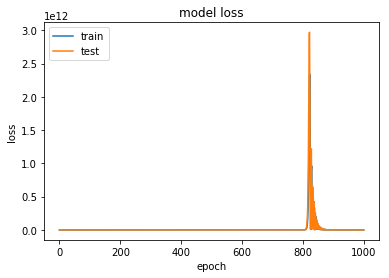

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
preds = model.predict(X_extract_age)

In [0]:
for i in range(39):
    print(preds[i][0], map_df['Survival'][i])

795.005 1155
619.505 614
307.255 698
680.005 439
479.005 180
818.005 616
227.00499 375
696.505 152
-274.995 522
-40.245007 120
2045.005 172
585.505 726
140.00499 510
591.005 453
356.005 350
913.005 788
254.75499 114
286.005 169
-171.99501 1767
304.005 1283
881.005 168
56.004993 473
354.005 401
393.005 515
187.25499 287
20.911245 106
1276.005 139
857.005 331
29.567495 448
1000.005 376
152.87999 1592
260.255 660
438.38 576
81.84875 465
357.255 503
234.00499 495
481.505 486
2388.005 368
353.505 50


In [0]:
# test

In [0]:
# test_image_folder = "../../test-images/image/"
test_image_folder = "./test-images/image/"

# sample_submission = np.genfromtxt('../../sample_submission.csv', 
sample_submission = np.genfromtxt('./sample_submission.csv', 
                                  delimiter=',', 
                                  dtype='str',
                                  skip_header = 1)
test_encode_list = sample_submission[:, 0]

In [0]:
# test_X = np.zeros((len(test_encode_list), 155, 240, 240, 4))
# for i, encode in enumerate(test_encode_list):
#     test_X[i, :, :, :, 0] = load_nii_gz(os.path.join(test_image_folder, encode, 't1.nii.gz'), transpose=True)
#     test_X[i, :, :, :, 1] = load_nii_gz(os.path.join(test_image_folder, encode, 't1ce.nii.gz'), transpose=True)
#     test_X[i, :, :, :, 2] = load_nii_gz(os.path.join(test_image_folder, encode, 't2.nii.gz'), transpose=True)
#     test_X[i, :, :, :, 3] = load_nii_gz(os.path.join(test_image_folder, encode, 'flair.nii.gz'), transpose=True)

test_X_seg = np.zeros((len(test_encode_list), 155, 240, 240))
test_X_flair = np.zeros((len(test_encode_list), 155, 240, 240))
for i, encode in enumerate(test_encode_list):
    test_X_seg[i, :, :, :] = load_nii_gz(os.path.join(test_image_folder, encode, 'seg.nii.gz'), transpose=True)
    test_X_flair[i, :, :, :] = load_nii_gz(os.path.join(test_image_folder, encode, 'flair.nii.gz'), transpose=True)

In [0]:
# test_df = pd.read_csv("../../test-age.csv")
test_df = pd.read_csv("./test-age.csv")
test_df = test_df.drop(columns=["Unnamed: 0"])
test_df.reset_index(drop=True, inplace=True)
test_df

,Encode,Age
0,4zqmljfrc675dtrky3gchyx87jkl3czk,29.120
1,t6if2ohjnd7mh06z81wwd3sp86h427ad,63.781
2,7rmkmfclt0mkmqs5b3e6rny5hwgwo11y,65.921
3,chjxxykw2lz1v37hgriyniblgi41d5y3,79.211
4,orhcxlyoc0x6idbzlqmbsdqduehdy75o,85.762
5,7rxxiwwbbxy0yoatpsyltln3v2wtne9e,72.293
6,0r3e6ezursuo5y6m3jwpztq763cjki0p,63.359
7,haz4ax59boce4twwwpzfq7hwydgqn9we,70.252
8,zcn7u2kqbrqlzgf07yzzjg5mqyqgqul1,51.589
9,27w6sraww3g2ui9fxpu08tcgyocprtqg,69.178


In [0]:
test_X_age = np.array(test_df['Age'])
test_X_age = test_X_age.reshape(20,1)

In [0]:
test_X_flair = test_X_flair.astype(np.uint32)
test_X_seg = test_X_seg.astype(np.uint32)

In [0]:
test_X_flair.shape

(20, 155, 240, 240)

In [0]:
unique, counts = np.unique(test_X_seg, return_counts=True)
dict(zip(unique, counts))

{0: 177019643, 1: 221682, 2: 1013682, 4: 304993}

{0.0: 177019643, 1.0: 221682, 2.0: 1013682, 4.0: 304993}

In [0]:
test_featureVectors = []
for (image, label) in tqdm.tqdm(zip(test_X_flair, test_X_seg)):
    featureVector = extractor.execute( \
        sitk.GetImageFromArray(image.T), sitk.GetImageFromArray(label.T))
    test_featureVectors.append(featureVector)

In [0]:
test_extracted_features = []
for orded_dict in test_featureVectors:
    feature = []
    for key, value in orded_dict.items():
        if key.startswith("original_"):
            feature.append(value)
    feature = np.array(feature)
    test_extracted_features.append(feature)
test_extracted_features = np.array(test_extracted_features)
print(test_extracted_features.shape)

(20, 56)


In [0]:
test_X_extactFeature_age = np.concatenate((test_extracted_features.reshape(20,-1), test_X_age.reshape(-1,1)), axis = 1)

In [0]:
test_preds = model.predict(test_X_extactFeature_age)

In [0]:
test_preds

array([[ 534.0014 ],
       [ 245.00142],
       [  35.31392],
       [ 300.00143],
       [ 310.00143],
       [ 624.0014 ],
       [ 224.00142],
       [ 140.00142],
       [ 191.00142],
       [ 592.0014 ],
       [ 208.00142],
       [ 352.00143],
       [ 960.0014 ],
       [ 264.00143],
       [  60.00142],
       [ 200.00142],
       [ 448.00143],
       [ 720.0014 ],
       [ 220.00142],
       [1224.0015 ]], dtype=float32)

In [0]:
test_preds_ = np.where(test_preds < 0, 0, test_preds)

In [0]:
print(test_preds_.shape)
test_preds_

(20, 1)


array([[ 534.0014 ],
       [ 245.00142],
       [  35.31392],
       [ 300.00143],
       [ 310.00143],
       [ 624.0014 ],
       [ 224.00142],
       [ 140.00142],
       [ 191.00142],
       [ 592.0014 ],
       [ 208.00142],
       [ 352.00143],
       [ 960.0014 ],
       [ 264.00143],
       [  60.00142],
       [ 200.00142],
       [ 448.00143],
       [ 720.0014 ],
       [ 220.00142],
       [1224.0015 ]], dtype=float32)

In [0]:
test_df['Age']

0     29.120
1     63.781
2     65.921
3     79.211
4     85.762
5     72.293
6     63.359
7     70.252
8     51.589
9     69.178
10    71.126
11    68.359
12    54.751
13    53.362
14    71.370
15    67.833
16    51.734
17    67.126
18    54.301
19    60.463
Name: Age, dtype: float64

In [0]:
solution_path = './radiomics_pred.csv'
with open(solution_path, 'w') as f:
    f.write('Encode,Survival\n')
    for i, encode in enumerate(test_encode_list):
        print(encode, test_preds_[i][0]) 
        f.write(encode + ',' + str(test_preds_[i][0]) + '\n')

4zqmljfrc675dtrky3gchyx87jkl3czk 534.0014
t6if2ohjnd7mh06z81wwd3sp86h427ad 245.00142
7rmkmfclt0mkmqs5b3e6rny5hwgwo11y 35.31392
chjxxykw2lz1v37hgriyniblgi41d5y3 300.00143
orhcxlyoc0x6idbzlqmbsdqduehdy75o 310.00143
7rxxiwwbbxy0yoatpsyltln3v2wtne9e 624.0014
0r3e6ezursuo5y6m3jwpztq763cjki0p 224.00142
haz4ax59boce4twwwpzfq7hwydgqn9we 140.00142
zcn7u2kqbrqlzgf07yzzjg5mqyqgqul1 191.00142
27w6sraww3g2ui9fxpu08tcgyocprtqg 592.0014
sedxnmxte7gxrdbbpx8p8b3jhurlrx3n 208.00142
ji97woc3vcyn9lzq5xfpk3j95i5vswmm 352.00143
09amv752acxnzvkfughexk0wilhxdtd5 960.0014
gg4o6f2xyb2zpclttmjy35lqnasg9vz4 264.00143
hjhau2e5j5p1zpwbbuocjiwplq20l2dz 60.00142
2398n5c5yz5km503of24gbxdb803gq5q 200.00142
do2ausaft9rrqogh8y16qb0vuy5roywm 448.00143
tspn2x2dggh1ugi1vizmvcrsll644p2a 720.0014
djquj44l7imhygd741v81p9gfc4nu5xk 220.00142
jbhvvv6rpu7mbs5bpu1byb31c9yzo9db 1224.0015
